# Matematický software - Úloha 1: Programová implementace SIR modelu

### Nemoc 1: Chřipka

- Reprodukční číslo R₀ = 1.3

- doba nakažení: 10 dní ⇒ gamma = 0.1

- Spočítáme beta:
    - β=R0⋅γ=1.3⋅0.1=0.13

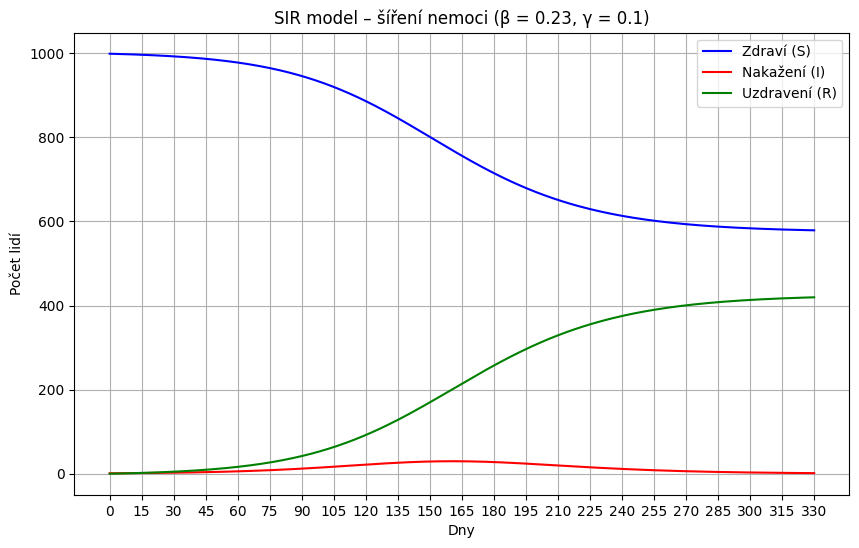

In [13]:
# SIR model – simulace chřipky (β = 0.13, γ = 0.1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametry modelu pro chřipku
beta = 0.13   # míra přenosu
gamma = 0.1   # míra zotavení
N = 1000      # celková populace

# Počáteční stavy
I0 = 1
R0 = 0
S0 = N - I0 - R0

# Definice modelu
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Časová osa
t = np.linspace(0, 330, 330)
y0 = [S0, I0, R0]

# Výpočet
solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T

# Vizualizace
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Zdraví (S)', color='blue')
plt.plot(t, I, label='Nakažení (I)', color='red')
plt.plot(t, R, label='Uzdravení (R)', color='green')
plt.xlabel('Dny')
plt.ylabel('Počet lidí')
plt.title('SIR model – šíření nemoci (β = 0.23, γ = 0.1)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 331, 15)) #intervaly po 15 dnech
plt.show()


#### Výsledky:
- Vrchol epidemie nastává přibližně 165. den, kdy je počet nakažených nejvyšší (ale stále nízký, cca 35 osob).

- Epidemie prakticky končí kolem 330. dne, kdy počet nakažených klesne téměř na nulu a křivky se ustálí.

- Onemocnělo přibližně 400 lidí, což je vidět z konečné hodnoty zelené křivky (R ≈ 400).

- Zdravých zůstalo cca 600 lidí, kteří nikdy nakaženi nebyli.

### Nemoc 2: Spalničky

- Reprodukční číslo R₀ = 12 až 18 (vezmeme např. 15)

- doba nakažení: 10 dní ⇒ gamma = 0.1

- Spočítáme beta:
    - β=R0⋅γ=15⋅0.1=1.5

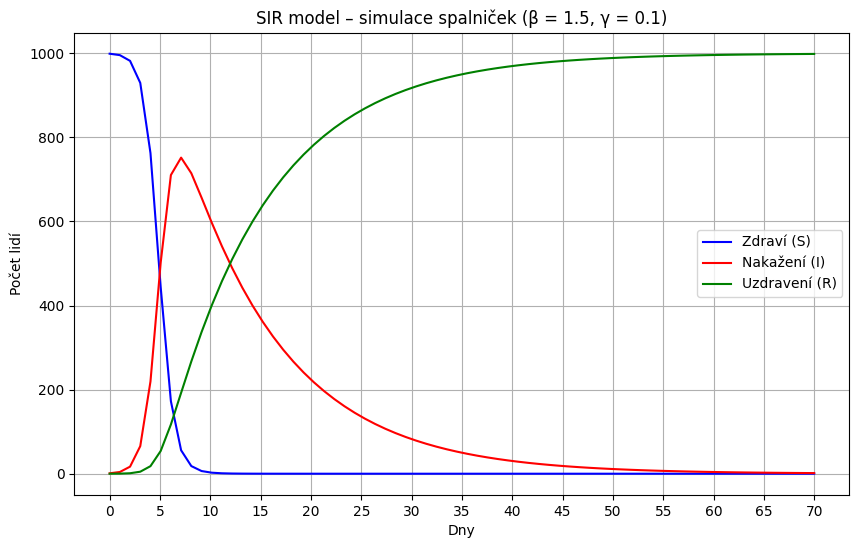

In [7]:
# SIR model – simulace šíření spalniček (β = 1.5, γ = 0.1)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametry pro spalničky
beta = 1.5   # extrémně nakažlivé (R₀ = 15)
gamma = 0.1  # zotavení za 10 dní
N = 1000

# Počáteční stavy
I0 = 1
R0 = 0
S0 = N - I0 - R0

def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

t = np.linspace(0, 70, 70) # dáme jenom 70 dní, jelikož spalničky jsou velmi nakažlivé
y0 = [S0, I0, R0]

solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T

plt.figure(figsize=(10,6))
plt.plot(t, S, label='Zdraví (S)', color='blue')
plt.plot(t, I, label='Nakažení (I)', color='red')
plt.plot(t, R, label='Uzdravení (R)', color='green')
plt.xlabel('Dny')
plt.ylabel('Počet lidí')
plt.title('SIR model – simulace spalniček (β = 1.5, γ = 0.1)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 71, 5)) # intervaly na 5 dní
plt.show()


#### Výsledky

- Vrchol epidemie nastává přibližně 8. den, kdy je nakažených nejvíce.

- Epidemie končí kolem 10ho dne, kdy populace už není dále nakažitelná (zdravých je 0).

- Onemocnělo téměř všech 1000 lidí, všichni přešli do skupiny R (uzdravení)

### Nemoc 3: Malárie

- Reprodukční číslo: R₀ ≈ 2 až 5 (vezmeme 4)

- Doba infekce (pomalé zotavení): např. 20 dní ⇒ gamma = 1/20 = 0.05

- Spočítáme:
    - β=R0⋅γ=4⋅0.05=0.2


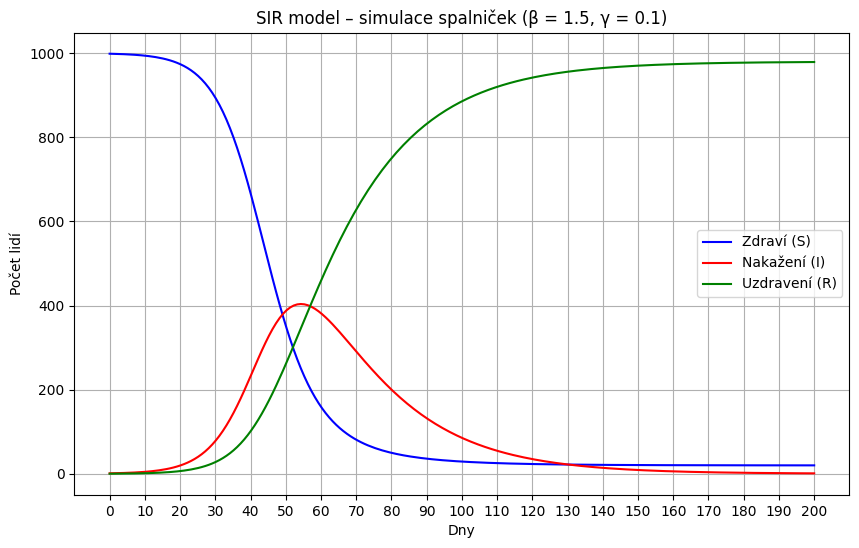

In [6]:
# SIR model – simulace šíření malárie (β = 0.2, γ = 0.05)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametry pro malárii
beta = 0.2
gamma = 0.05
N = 1000

# Počáteční stavy
I0 = 1
R0 = 0
S0 = N - I0 - R0

def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

t = np.linspace(0, 200, 200) 
y0 = [S0, I0, R0]

solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T

plt.figure(figsize=(10,6))
plt.plot(t, S, label='Zdraví (S)', color='blue')
plt.plot(t, I, label='Nakažení (I)', color='red')
plt.plot(t, R, label='Uzdravení (R)', color='green')
plt.xlabel('Dny')
plt.ylabel('Počet lidí')
plt.title('SIR model – simulace spalniček (β = 1.5, γ = 0.1)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 201, 10))
plt.show()

#### Výsledky

- Vrchol epidemie nastává přibližně 53. den, kdy je nakažených nejvíce.

- Epidemie končí kolem 190. dne, kdy počet nakažených klesne téměř na nulu.

- Onemocnělo přibližně 980 lidí, tedy většina populace. Zdravých zůstává přibližně 20 lidí.

### Nemoc 4: Běžné nachlazení (rýmička)

- Reprodukční číslo: R₀ ≈ 1.2

- Doba nemoci: cca 7 dní ⇒ γ = 1/7 ≈ 0.143

- Spočítáme:
    - β=R0⋅γ=1.2⋅0.143≈0.1716

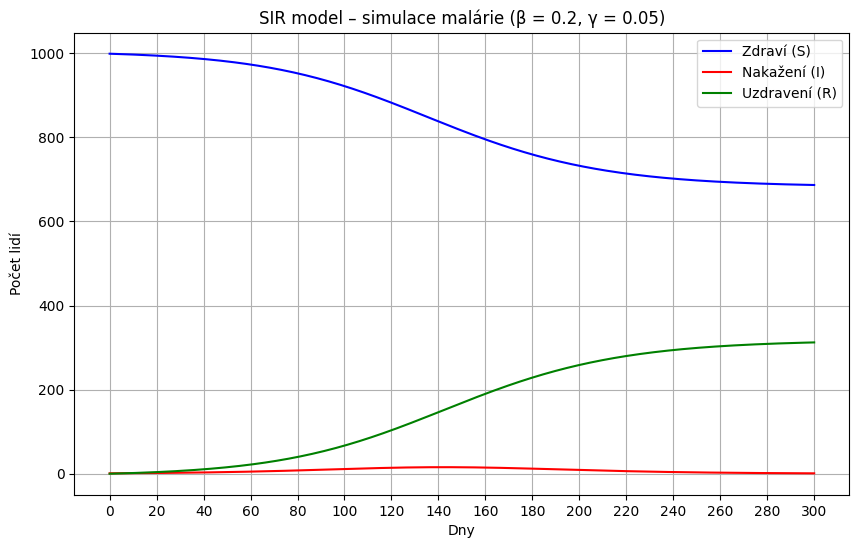

In [5]:
# SIR model – simulace rýmičky (β = 0.1716, γ = 0.143)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametry pro rýmičku
beta = 0.1716
gamma = 0.143
N = 1000

# Počáteční stavy
I0 = 1
R0 = 0
S0 = N - I0 - R0

def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

t = np.linspace(0, 300, 300)
y0 = [S0, I0, R0]

solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T

plt.figure(figsize=(10,6))
plt.plot(t, S, label='Zdraví (S)', color='blue')
plt.plot(t, I, label='Nakažení (I)', color='red')
plt.plot(t, R, label='Uzdravení (R)', color='green')
plt.xlabel('Dny')
plt.ylabel('Počet lidí')
plt.title('SIR model – simulace malárie (β = 0.2, γ = 0.05)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 301, 20))  # intervaly po 20 dnech
plt.show()


#### výsledky

- Vrchol epidemie: nenastává žádný prudký nárůst, maximum je malé a rozprostřené – třeba kolem dne 170.

- Epidemie neproběhne plošně – většina populace zůstane zdravá.

- Uzdraví se jen cca 250 lidí, zbytek (cca 750) zůstává nenakažený.

### Nemoc 5: COVID-19 (začátek pandemie)

- Reprodukční číslo: R₀ ≈ 2.5

- Doba infekce: cca 14 dní ⇒ γ = 1/14 ≈ 0.071

- Spočítáme:
    - β=R0⋅γ=2.5⋅0.071≈0.1775

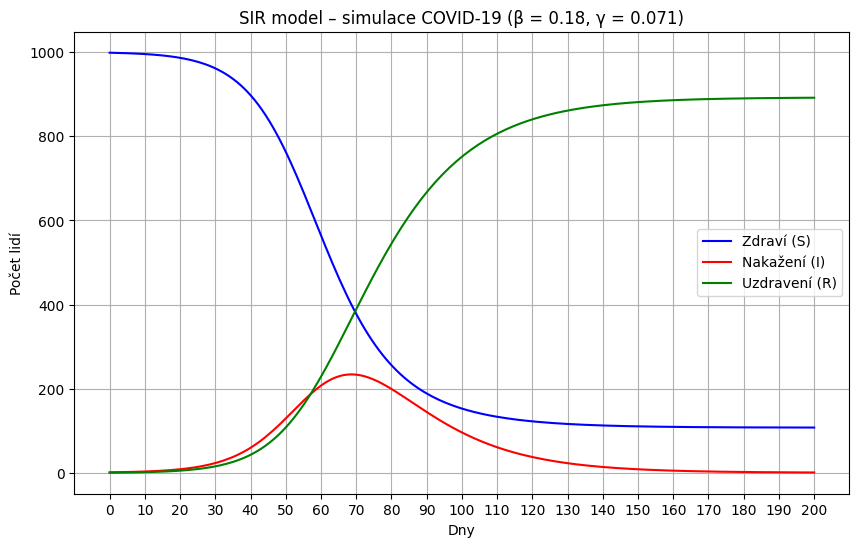

In [4]:
# SIR model – simulace COVID-19 (β = 0.1775, γ = 0.071)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametry pro COVID-19
beta = 0.1775
gamma = 0.071
N = 1000

# Počáteční stavy
I0 = 1
R0 = 0
S0 = N - I0 - R0

def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

t = np.linspace(0, 200, 200)
y0 = [S0, I0, R0]

solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T

plt.figure(figsize=(10,6))
plt.plot(t, S, label='Zdraví (S)', color='blue')
plt.plot(t, I, label='Nakažení (I)', color='red')
plt.plot(t, R, label='Uzdravení (R)', color='green')
plt.xlabel('Dny')
plt.ylabel('Počet lidí')
plt.title('SIR model – simulace COVID-19 (β = 0.18, γ = 0.071)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 201, 10)) # intervaly po 10 dnech
plt.show()
